# Scaling 

In [1]:
# Last step before model traning 
# transform data features into same scale  is called as scaling 
#there are 2 methodsfro sacaling 
# 1  : standarddization 
# 2 : Normalization 
# 3 : Robust scaler 

# scaling on input features 
# no need of scaling target variable 


# for free based algorithm : we dont need scaling 

In [2]:
# 1 Standardization ................Z-score , standard scaler 
#convert data in such a way that we will get mean=0 and sd=1

In [6]:
import seaborn as sns 
df=sns.load_dataset('titanic')

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: ylabel='Density'>

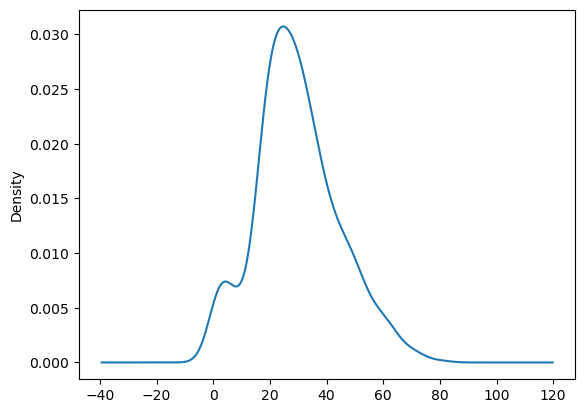

In [8]:
df['age'].plot(kind='kde')

In [9]:
df['age'].isnull().sum().sum()

177

In [10]:
df['age'].mean()

29.69911764705882

In [13]:
df['age']=df['age'].fillna(df['age'].mean().round())

In [14]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
df['age'].isnull().sum()

0

In [24]:
df['sex']=df['sex'].map({'male':0,'female':1})

In [34]:
df.drop(['embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)

In [35]:
X=df.drop('survived',axis=1)
y=df['survived']

In [36]:
X.describe()

,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
# formula : x['age']=x['age'] - x['age'].mean()/x['age'].std()

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X)


array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361,
        -0.49237783]])

In [42]:
X_sc=sc.fit_transform(X)

In [43]:
X_sc

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361,
        -0.49237783]])

In [47]:
##################

In [ ]:
#2 Normalization 
# use if data dosent follow normal distribution